In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-dataset-for-text-classification-ag-news/train.csv
/kaggle/input/new-dataset-for-text-classification-ag-news/test.csv


# Task : News Category Classification

In [2]:
train_df = pd.read_csv('/kaggle/input/new-dataset-for-text-classification-ag-news/train.csv')
train_df.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [3]:
test_df = pd.read_csv('/kaggle/input/new-dataset-for-text-classification-ag-news/test.csv')
test_df.head()

,text,label
0,Fears for T N pension after talks Unions repre...,2
1,The Race is On: Second Private Team Sets Launc...,3
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7600 non-null   object
 1   label   7600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.9+ KB


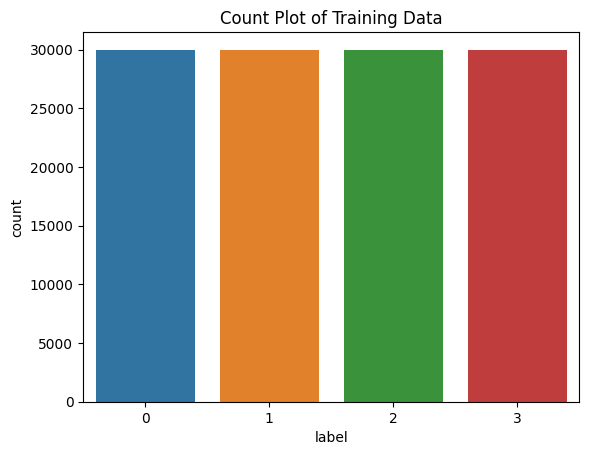

In [6]:
# Expository Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=train_df)
plt.title("Count Plot of Training Data")
plt.show()

#Means there are four labels and they are almost equal in size 


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


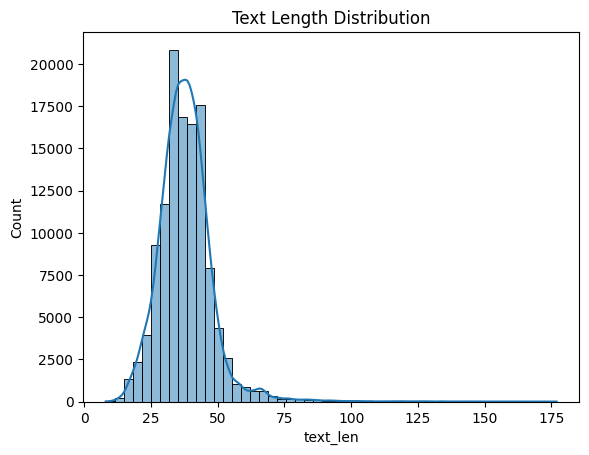

In [7]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split()))
sns.histplot(train_df['text_len'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

In [8]:

from collections import Counter
all_words = " ".join(train_df['text']).split()
Counter(all_words).most_common(20)

[('the', 177529),
 ('to', 117605),
 ('a', 98112),
 ('of', 97395),
 ('in', 92055),
 ('and', 68046),
 ('on', 55156),
 ('for', 48430),
 ('-', 39105),
 ('#39;s', 30928),
 ('that', 26988),
 ('The', 25054),
 ('with', 24531),
 ('as', 23641),
 ('at', 23186),
 ('its', 21390),
 ('is', 20708),
 ('by', 19048),
 ('has', 18605),
 ('from', 16928)]

In [9]:
# Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)
train_df['Cleaned_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)
    

In [11]:
train_df.head()

,text,label,text_len,Cleaned_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,21,wall st bear claw back black reuters reuters s...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,36,carlyle look toward commercial aerospace reute...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,36,oil economy cloud stock outlook reuters reuter...
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,36,iraq halt oil export main southern pipeline re...
4,"Oil prices soar to all-time record, posing new...",2,37,oil price soar alltime record posing new menac...


In [12]:
test_df.head()

,text,label,clean_text
0,Fears for T N pension after talks Unions repre...,2,fear n pension talk union representing worker ...
1,The Race is On: Second Private Team Sets Launc...,3,race second private team set launch date human...
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3,ky company win grant study peptide ap ap compa...
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3,prediction unit help forecast wildfire ap ap b...
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3,calif aim limit farmrelated smog ap ap souther...


In [13]:
train_df = train_df.drop(columns=['text', 'text_len'])
train_df.head()

,label,Cleaned_text
0,2,wall st bear claw back black reuters reuters s...
1,2,carlyle look toward commercial aerospace reute...
2,2,oil economy cloud stock outlook reuters reuter...
3,2,iraq halt oil export main southern pipeline re...
4,2,oil price soar alltime record posing new menac...


In [14]:
test_df = test_df.drop(columns = ['text'])
test_df.head()

,label,clean_text
0,2,fear n pension talk union representing worker ...
1,3,race second private team set launch date human...
2,3,ky company win grant study peptide ap ap compa...
3,3,prediction unit help forecast wildfire ap ap b...
4,3,calif aim limit farmrelated smog ap ap souther...


In [15]:
# Model Training
from sklearn.model_selection import train_test_split

X = train_df['Cleaned_text']
y = train_df[ 'label']

X_train, X_val, y_train , y_val = train_test_split(X, y, test_size= 0.2 , random_state = 42, stratify = y)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])

Train size: 96000
Validation size: 24000


In [16]:
# Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_df["clean_text"])

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_reg = LogisticRegression(max_iter = 300)
logistic_reg.fit(X_train_vec, y_train)

lg_y_pred = logistic_reg.predict(X_val_vec)

print("Logistic Regression Accuracy is : ", accuracy_score(y_val, lg_y_pred))
print("Classification Report: ")
print(classification_report(y_val, lg_y_pred))

Logistic Regression Accuracy is :  0.9128333333333334
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6000
           1       0.95      0.97      0.96      6000
           2       0.88      0.89      0.89      6000
           3       0.89      0.89      0.89      6000

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



In [18]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, random_state = 42, n_jobs = -1)
rf.fit(X_train_vec, y_train)

rf_y_pred = rf.predict(X_val_vec)


print("Random Forest Validation Accuracy:", accuracy_score(y_val, rf_y_pred))
print(classification_report(y_val, rf_y_pred))

Random Forest Validation Accuracy: 0.88425
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6000
           1       0.91      0.96      0.94      6000
           2       0.86      0.86      0.86      6000
           3       0.87      0.84      0.85      6000

    accuracy                           0.88     24000
   macro avg       0.88      0.88      0.88     24000
weighted avg       0.88      0.88      0.88     24000



In [19]:
# SVM
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state = 42)
svm.fit(X_train_vec, y_train)

svm_y_pred = svm.predict(X_val_vec)

print("SVM Validation Accuracy:", accuracy_score(y_val, svm_y_pred))
print(classification_report(y_val, svm_y_pred))

SVM Validation Accuracy: 0.9125
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6000
           1       0.95      0.98      0.96      6000
           2       0.88      0.89      0.89      6000
           3       0.89      0.89      0.89      6000

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



In [20]:
# Gradient Boosting

from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric = 'mlogloss', use_label_encoder = False)
xgb.fit(X_train_vec, y_train)

xgb_y_pred= xgb.predict(X_val_vec)

print("XGB Validation Accuracy: ", accuracy_score(y_val, xgb_y_pred))
print(classification_report(y_val, xgb_y_pred))

XGB Validation Accuracy:  0.8907083333333333
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      6000
           1       0.92      0.96      0.94      6000
           2       0.87      0.87      0.87      6000
           3       0.86      0.86      0.86      6000

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000



In [21]:
# Simple Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X_train_dense = X_train_vec.toarray()
X_val_dense = X_val_vec.toarray()

model= Sequential(
    [
        Dense(256, activation= 'relu', input_shape=(X_train_dense.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(len(y.unique()), activation = 'softmax')
    ]
)

model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_dense, y_train, validation_data = (X_val_dense , y_val), epochs = 5 , batch_size = 64)

2025-08-23 07:17:32.953491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755933453.217517      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755933453.289547      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-23 07:17:57.314853: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.8338 - loss: 0.4799 - val_accuracy: 0.9138 - val_loss: 0.2548
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9273 - loss: 0.2129 - val_accuracy: 0.9158 - val_loss: 0.2535
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9448 - loss: 0.1590 - val_accuracy: 0.9153 - val_loss: 0.2660
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9615 - loss: 0.1119 - val_accuracy: 0.9140 - val_loss: 0.3022
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9743 - loss: 0.0746 - val_accuracy: 0.9135 - val_loss: 0.3428


In [22]:
X_test_dense = X_test_vec.toarray()

test_loss, test_accuracy = model.evaluate(X_test_dense, test_df["label"], verbose=1)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9035 - loss: 0.3641
✅ Test Accuracy: 0.9062
✅ Test Loss: 0.3573


In [23]:
y_true = test_df["label"].values
y_pred_probs = model.predict(X_test_dense)
y_pred = y_pred_probs.argmax(axis=1)

print(classification_report(y_true, y_pred))

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1900
           1       0.95      0.97      0.96      1900
           2       0.88      0.86      0.87      1900
           3       0.87      0.89      0.88      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

